In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import joblib

import warnings

warnings.filterwarnings('ignore')

print("Libraries imported successfully !")

Libraries imported successfully !


In [2]:
df = pd.read_csv("house_price_regression_dataset.csv")
df.head()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,1360,2,1,1981,0.599637,0,5,2.623829e+05
1,4272,3,3,2016,4.753014,1,6,9.852609e+05
2,3592,1,2,2016,3.634823,0,9,7.779774e+05
3,966,1,2,1977,2.730667,1,8,2.296989e+05
4,4926,2,1,1993,4.699073,0,8,1.041741e+06


## Feature Engineering

In [3]:
#Extract "House Age" from the "Year_Built" column
df['House_Age'] = 2025 - df['Year_Built']
df.drop(columns=["Year_Built"], inplace=True)
df.head()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price,House_Age
0,1360,2,1,0.599637,0,5,2.623829e+05,44
1,4272,3,3,4.753014,1,6,9.852609e+05,9
2,3592,1,2,3.634823,0,9,7.779774e+05,9
3,966,1,2,2.730667,1,8,2.296989e+05,48
4,4926,2,1,4.699073,0,8,1.041741e+06,32


## Defining features and traget

In [4]:
# Define features and target
X = df[['Square_Footage', 'Num_Bedrooms', 'Num_Bathrooms', 'House_Age', 'Lot_Size', 'Garage_Size', 'Neighborhood_Quality']]
y = df['House_Price']

In [5]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
# Step 6: Train the model
model = RandomForestRegressor(random_state=42, n_estimators=100)
model.fit(X_train, y_train)

# Step 7: Evaluate the model
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

# Step 8: Persist the model
joblib.dump(model, 'house_price_model.pkl')

print("Model !!!")

Mean Absolute Error (MAE): 16096.511361414627
Mean Squared Error (MSE): 393249284.99129623
R-squared (R²): 0.9938992203280097
Model !!!


In [13]:
# Load the persisted model and scaler
model = joblib.load('house_price_model.pkl')
print("Loaded Regression Model")

# Prepare new data
new_data = pd.DataFrame({
    'Square_Footage': [2500],
    'Num_Bedrooms': [4],
    'Num_Bathrooms': [3],
    'House_Age': [2010],
    'Lot_Size': [0.5],
    'Garage_Size': [2],
    'Neighborhood_Quality': [8]
})

# Scale the new data and make a prediction
# new_data_scaled = scaler.transform(new_data)
prediction = model.predict(new_data)

print(f"Predicted House Price: $ {prediction[0]}")


Loaded Regression Model
Predicted House Price: $ 530560.9145444713


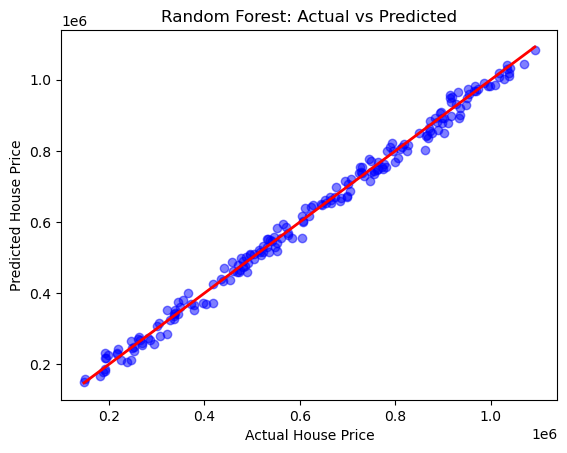

In [8]:
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)  # Ideal best fit line
plt.xlabel('Actual House Price')
plt.ylabel('Predicted House Price')
plt.title('Random Forest: Actual vs Predicted')
plt.show()

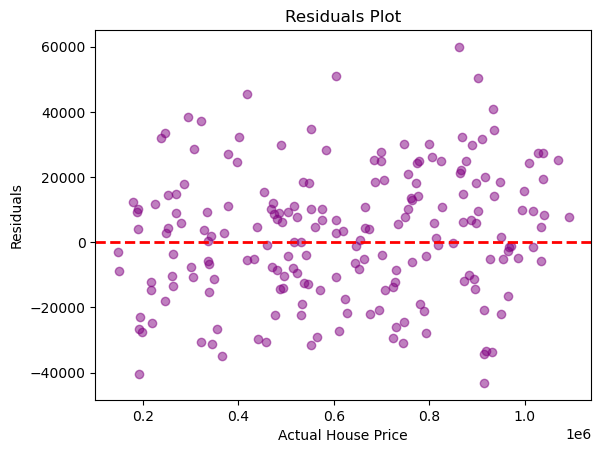

In [9]:
# Calculate residuals
residuals = y_test - y_pred

# Plot residuals
plt.scatter(y_test, residuals, color='purple', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)  # Zero line
plt.xlabel('Actual House Price')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()

In [14]:
joblib.__version__

'1.2.0'

In [16]:
pd.__version__

'2.1.4'

In [17]:
np.__version__

'1.26.4'